# Thermal Speed

In [143]:
%matplotlib inline

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

from plasmapy.formulary import (
    Maxwellian_speed_1D,
    Maxwellian_speed_2D,
    Maxwellian_speed_3D,
)
from plasmapy.formulary.speeds import thermal_speed

[thermal_speed]: ../../api/plasmapy.formulary.speeds.thermal_speed.rst#plasmapy.formulary.speeds.thermal_speed

The [thermal_speed] function can be used to calculate the thermal velocity for a Maxwellian velocity distribution. There are three common definitions of the thermal velocity, which can be selected using the "method" keyword, which are defined for a 3D velocity distribution as

- `most_probable` <br>
$v_{th} = \sqrt{\frac{2 k_B T}{m}}$

- `rms` <br>
$\bar{v} = \sqrt{\frac{3 k_B T}{m}}$

- `mean_magnitude` <br>
$\langle v \rangle = \sqrt{\frac{8 k_B T}{m\pi}}$

The differences between these velocities can be seen by plotting them on a 3D Maxwellian speed distribution. Plotting the theoretical distribution is possible using the function `Maxwellian_speed_3D()`, which requires the input of a range of speeds, the temperature, and the particle species. We normalize all the speeds to the rms speed, so we are making a relative rather than absolute comparison.

Text(0, 0.5, 'f(|v|)')

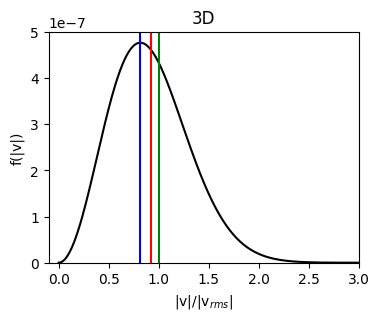

In [144]:
T = 1e5 * u.K #define our temperature
speeds = np.linspace(0, 8e6, num=600) * u.m / u.s #define the range of our x axis

pdf_3D = Maxwellian_speed_3D(speeds, T=T, particle="e-") # pdf stands for particle distribution function, in this case

fig, ax = plt.subplots(figsize=(4, 3))

v_most_prob = thermal_speed(T=T, particle="e-", method="most_probable", ndim=3)
v_rms = thermal_speed(T=T, particle="e-", method="rms", ndim=3)
v_mean = thermal_speed(T=T, particle="e-", method="mean_magnitude", ndim=3)

ax.plot(speeds / v_rms, pdf_3D, color="black", label="Maxwellian")

ax.axvline(x=v_most_prob / v_rms, color="blue", label="Most Probable")
ax.axvline(x=v_rms / v_rms, color="green", label="RMS")
ax.axvline(x=v_mean / v_rms, color="red", label="Mean")

ax.set_xlim(-0.1, 3)
ax.set_ylim(0, None)
ax.set_title("3D")
ax.set_xlabel("|v|/|v$_{rms}|$")
ax.set_ylabel("f(|v|)")

These speeds vary for 1D, 2D, and 3D distributions. The differences between these definitions can be illustrated by plotting them on their respective Maxwellian speed distributions, which have their own PlasmaPy functions.

<Figure size 640x480 with 0 Axes>

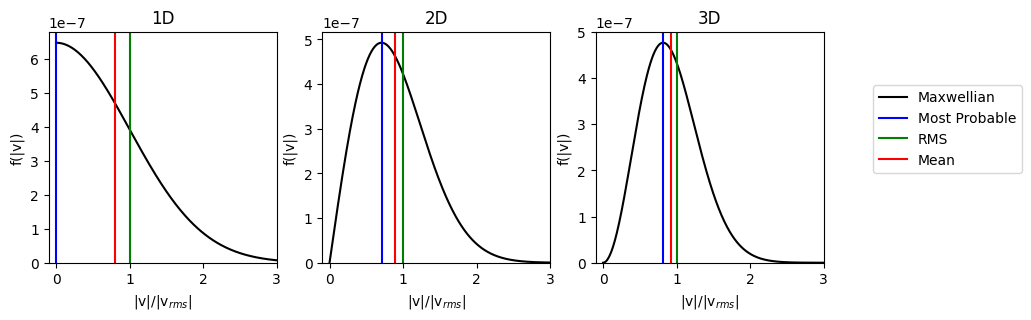

In [145]:
pdf_1D = Maxwellian_speed_1D(speeds, T=T, particle="e-")
pdf_2D = Maxwellian_speed_2D(speeds, T=T, particle="e-")

dim = [1, 2, 3]
#define a list of the 3 distributions
pdfs = [pdf_1D, pdf_2D, pdf_3D]

plt.tight_layout()
fig, ax = plt.subplots(ncols=3, figsize=(10, 3)) #establishes ax. as our command to call multiple subplots

for n, pdf in enumerate(pdfs):
    ndim = n + 1 #n begins at 0 by default, but our dimensions begin at 1
    v_most_prob = thermal_speed(T=T, particle="e-", method="most_probable", ndim=ndim)
    v_rms = thermal_speed(T=T, particle="e-", method="rms", ndim=ndim)
    v_mean = thermal_speed(
        T=T, particle="e-", method="mean_magnitude", ndim=ndim
    )

    ax[n].plot(speeds / v_rms, pdf, color="black", label="Maxwellian")

    ax[n].axvline(x=v_most_prob / v_rms, color="blue", label="Most Probable")
    ax[n].axvline(x=v_rms / v_rms, color="green", label="RMS")
    ax[n].axvline(x=v_mean / v_rms, color="red", label="Mean")

    ax[n].set_xlim(-0.1, 3)
    ax[n].set_ylim(0, None)
    ax[n].set_title(f"{ndim:d}D")
    ax[n].set_xlabel("|v|/|v$_{rms}|$")
    ax[n].set_ylabel("f(|v|)")

#set location of legend, in relation to third plot
ax[2].legend(bbox_to_anchor=(1.9, 0.8), loc="upper right")

The Maxwellian distribution function is a theoretical distribution that may or may not fit data collected on plasma or gases. When distributions deviate, it is usually an indicator of other significant physical processes occuring, like collisions, heating, instabilities, etc. Or it could mean something is wrong with your instrument. 

Let's explore the relationship between real data and a theoretical PDF.

[here]: https://github.com/Gateway-to-Plasma/introduction-to-python/blob/main/example_velocities.txt
We will import the data from the file 'example_velocities.txt', which you will need to download from [here]. It contains the x,y, and z components of some imaginary data taken of protons at 5772 K (the same temperature as the surface of the sun). 

In [146]:
data = np.loadtxt('example_velocities.txt',skiprows=1)
v_x = data[:,0] * u.m/u.s #We need to specify units if we would like to use unit conversions later
v_y = data[:,1] * u.m/u.s
v_z = data[:,2] * u.m/u.s

The total formula for the total magnitude of the velocity is:

$$ |v| = v_x^2 + v_y^2 + v_z^2 $$.

We can calculate this directly, noting that our units will carry through.

In [147]:
#calculate the total magnitude of v for each proton, |v|
total_v = np.sqrt(v_x**2 + v_y**2 + v_z**2)

[mean]: https://en.wikipedia.org/wiki/Mean
[RMS]: https://en.wikipedia.org/wiki/Root_mean_square

Let's compare our thermal velocity values between the data and the theoretical prediction. Our data set is limited to only 100 values, so calculating the most probable speed (mode), isn't very reliable in this case (most values only occur once).

But, we can calulate the [RMS] and the [mean]. When working with velocity data, we use the statistical definitions of these quantities.

The definition of the [mean] velocity is:

$$ \langle v \rangle = \frac{|v|_1 + |v|_2 + ... + |v|_n}{n} $$

The [RMS] (root-mean-square) value is the square root of the mean of the squares:

$$ \bar{v} = \sqrt{ \langle |v|^2 \rangle} $$.

For calculating these quantities, use the functions `np.mean()` and `np.sqrt()`. Be careful when calculating the RMS: you need to square $|v|$ before taking the mean.

Change the cell below from Markdown to Code and fill in the calculations for the values.

import astropy.units as u 

#Calculate Data-based values
data_v_rms = (Input your calculation for RMS based on the equation for $\bar{v}$ above) #The correct units are carried through the calculation
data_v_mean = (Input your calculation for the mean of $|v|$) 

#Calculate Theoretical values
#The thermal_speed function automatically applies the SI unit to these quantities
v_rms = (Use `thermal_speed()` as before to calculate) 
v_mean = (Use `thermal_speed()` as before to calculate) 


#Print the values, in km/s instead of m/s
print(data_v_rms.to('km/s'), data_v_mean.to('km/s'))
print(v_rms.to('km/s'), v_mean.to('km/s'))

Our predicted values are very close to the values calculated from the data, suggesting that indeed the data we've taken is following a Maxwellian distribution. However, it would help to visualize all the data at once to compare.

[plt.hist]: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

When plotting the probability distribution of a data set, we use histograms. We can use [plt.hist] to automatically bin the data and view the distribution of values. Then we can overplot the theoretical distribution to compare our theory to our data.

Text(0, 0.5, 'f(|v|)')

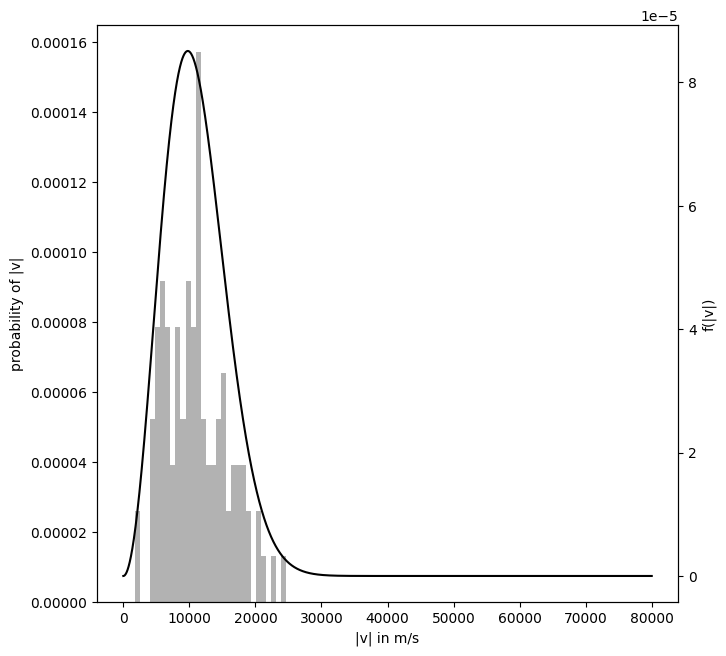

In [150]:
fig = plt.figure(figsize=(7.5, 7.5))

ax1 = plt.subplot() #Defines ax1 as a subplot
ax2 = ax1.twinx() #defines ax2 as a plot with the same x axis as the first, but its own y axis.

ax1.hist(total_v, bins=30, density = True, alpha=0.6, color='gray')

T = 5772 * u.K #redefine our temperature
speeds = np.linspace(0, 8e4, num=8000) * u.m / u.s 
pdf_3D = Maxwellian_speed_3D(speeds, T=T, particle="p+") #redefine our 3D Maxwellian


ax2.plot(speeds, pdf_3D, color="black", label="Maxwellian")
#ax1.set_xlim(-0.1, 3)
ax1.set_xlabel("|v| in m/s")
ax1.set_ylabel("probability of |v|")
ax2.set_ylabel("f(|v|)")

Our curve and data fit well enough we can say there is a Maxwellian distribution of velocities for our data, one that matches the profile of 5772 K. Presumably as we take more data points, more of the area under the curve would turn gray, though it is also statistically possible to have more points appear outside of the curve. We would expect more data to yield a better match to theory IF our theory isn't missing any pieces.

Play around: If you change the temperature of the theoretical distribution, does the curve still fit the data? How does